In [1]:
pip install yfinance

In [2]:
import yfinance as yf
import os
import pandas as pd

In [3]:
btc_ticker = yf.Ticker("BTC-USD")

In [4]:
btc =btc_ticker.history(period="max")

C:\Users\bandi\anaconda3\Lib\site-packages\yfinance\base.py:304: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dividends"].fillna(0, inplace=True)
C:\Users\bandi\anaconda3\Lib\site-packages\yfinance\base.py:304: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Dividends"].fillna(0, inplace=True)
C:\Users\b

In [5]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2024-10-25 00:00:00+00:00,68165.296875,68722.156250,65521.792969,66642.414062,41469984306,0,0
2024-10-26 00:00:00+00:00,66628.734375,67317.921875,66360.593750,67014.695312,19588098156,0,0
2024-10-27 00:00:00+00:00,67023.476562,68221.312500,66847.226562,67929.296875,16721307878,0,0


In [6]:
btc.index = pd.to_datetime(btc.index)

In [7]:
del btc["Dividends"]
del btc["Stock Splits"]

In [8]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

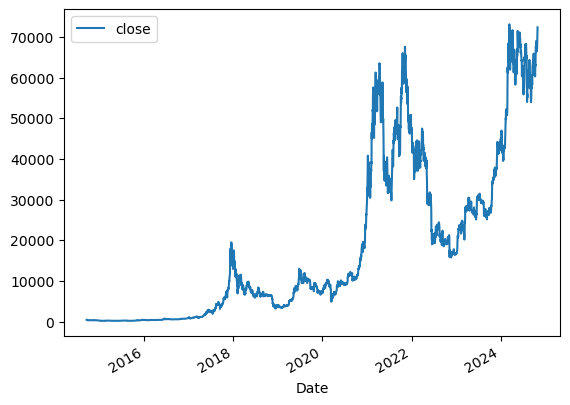

In [9]:
btc.plot.line(y="close", use_index=True)

In [10]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [11]:
wiki

,edit_count,pos_sentiment,neg_sentiment
2018-01-30,6.366667,-0.362242,0.616334
2018-01-31,6.333333,-0.395199,0.616334
2018-02-01,6.133333,-0.397686,0.599667
2018-02-02,5.466667,-0.421816,0.610778
2018-02-03,5.200000,-0.409126,0.604111
...,...,...,...
2024-10-26,0.666667,-0.161543,0.213333
2024-10-27,0.666667,-0.161543,0.213333
2024-10-28,0.666667,-0.161543,0.213333
2024-10-29,0.766667,-0.150951,0.224444


In [12]:
btc.index = btc.index.tz_localize(None)
wiki.index = wiki.index.tz_localize(None)
btc = btc.merge(wiki, left_index=True, right_index=True)
btc

,open,high,low,close,volume,edit_count,pos_sentiment,neg_sentiment
2018-01-30,11306.799805,11307.200195,10036.200195,10106.299805,8637859840,6.366667,-0.362242,0.616334
2018-01-31,10108.200195,10381.599609,9777.419922,10221.099609,8041160192,6.333333,-0.395199,0.616334
2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,6.133333,-0.397686,0.599667
2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,5.466667,-0.421816,0.610778
2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,5.200000,-0.409126,0.604111
...,...,...,...,...,...,...,...,...
2024-10-25,68165.296875,68722.156250,65521.792969,66642.414062,41469984306,0.666667,-0.161543,0.213333
2024-10-26,66628.734375,67317.921875,66360.593750,67014.695312,19588098156,0.666667,-0.161543,0.213333
2024-10-27,67023.476562,68221.312500,66847.226562,67929.296875,16721307878,0.666667,-0.161543,0.213333
2024-10-28,67922.671875,70212.265625,67535.132812,69907.757812,38799856657,0.666667,-0.161543,0.213333


In [13]:
btc["tomorrow"] = btc["close"].shift(-1)
btc

,open,high,low,close,volume,edit_count,pos_sentiment,neg_sentiment,tomorrow
2018-01-30,11306.799805,11307.200195,10036.200195,10106.299805,8637859840,6.366667,-0.362242,0.616334,10221.099609
2018-01-31,10108.200195,10381.599609,9777.419922,10221.099609,8041160192,6.333333,-0.395199,0.616334,9170.540039
2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,6.133333,-0.397686,0.599667,8830.750000
2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,5.466667,-0.421816,0.610778,9174.910156
2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,5.200000,-0.409126,0.604111,8277.009766
...,...,...,...,...,...,...,...,...,...
2024-10-25,68165.296875,68722.156250,65521.792969,66642.414062,41469984306,0.666667,-0.161543,0.213333,67014.695312
2024-10-26,66628.734375,67317.921875,66360.593750,67014.695312,19588098156,0.666667,-0.161543,0.213333,67929.296875
2024-10-27,67023.476562,68221.312500,66847.226562,67929.296875,16721307878,0.666667,-0.161543,0.213333,69907.757812
2024-10-28,67922.671875,70212.265625,67535.132812,69907.757812,38799856657,0.666667,-0.161543,0.213333,72339.859375


In [14]:
btc["target"] = (btc["tomorrow"]> btc["close"]).astype(float)

In [15]:
btc

,open,high,low,close,volume,edit_count,pos_sentiment,neg_sentiment,tomorrow,target
2018-01-30,11306.799805,11307.200195,10036.200195,10106.299805,8637859840,6.366667,-0.362242,0.616334,10221.099609,1.0
2018-01-31,10108.200195,10381.599609,9777.419922,10221.099609,8041160192,6.333333,-0.395199,0.616334,9170.540039,0.0
2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,6.133333,-0.397686,0.599667,8830.750000,0.0
2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,5.466667,-0.421816,0.610778,9174.910156,1.0
2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,5.200000,-0.409126,0.604111,8277.009766,0.0
...,...,...,...,...,...,...,...,...,...,...
2024-10-25,68165.296875,68722.156250,65521.792969,66642.414062,41469984306,0.666667,-0.161543,0.213333,67014.695312,1.0
2024-10-26,66628.734375,67317.921875,66360.593750,67014.695312,19588098156,0.666667,-0.161543,0.213333,67929.296875,1.0
2024-10-27,67023.476562,68221.312500,66847.226562,67929.296875,16721307878,0.666667,-0.161543,0.213333,69907.757812,1.0
2024-10-28,67922.671875,70212.265625,67535.132812,69907.757812,38799856657,0.666667,-0.161543,0.213333,72339.859375,1.0


In [16]:
btc["target"].value_counts()

target
1.0    1265
0.0    1200
Name: count, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier

predictors = ["close", "volume", "open", "high", "low", "edit_count", "pos_sentiment", "neg_sentiment"]

split_index = int(len(btc) * 0.8)

# Create training and testing sets
train = btc.iloc[:split_index]  # 80% for training
test = btc.iloc[split_index:]    # 20% for testing

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

model.fit(train[predictors], train["target"])

test_predictions = model.predict(test[predictors])

In [18]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.49473684210526314

In [19]:
def predict(train, test, predictors,model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"],preds], axis=1)
    return combined

In [20]:
def backtest(data, model, predictors, start=700, step=100):
    all_predictions =[]
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [21]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=0, learning_rate=.2, n_estimators=200)
predictions = backtest(btc, model, predictors)
predictions

,target,predictions
2019-12-31,1.0,1
2020-01-01,0.0,1
2020-01-02,1.0,1
2020-01-03,1.0,0
2020-01-04,1.0,0
...,...,...
2024-10-25,1.0,0
2024-10-26,1.0,1
2024-10-27,1.0,0
2024-10-28,1.0,1


#Old Score

In [24]:
precision_score(predictions["target"], predictions["predictions"])

0.49038461538461536

In [25]:
from sklearn.metrics import f1_score
f1 = f1_score(predictions["target"], predictions["predictions"])
print(f"F1 Score: {f1:.8f}")

F1 Score: 0.43776824


In [26]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "pos_sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"]/rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]
        
        rolling = btc.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]
        
        new_predictors += [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [27]:
btc, new_predictors = compute_rolling(btc.copy())

In [28]:
btc

,open,high,low,close,volume,edit_count,pos_sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2018-01-30,11306.799805,11307.200195,10036.200195,10106.299805,8637859840,6.366667,-0.362242,0.616334,10221.099609,1.0,...,NaN,1.000000,6.366667,NaN,1.000000,6.366667,NaN,1.000000,6.366667,NaN
2018-01-31,10108.200195,10381.599609,9777.419922,10221.099609,8041160192,6.333333,-0.395199,0.616334,9170.540039,0.0,...,1.0,1.005648,6.350000,1.000000,1.005648,6.350000,1.000000,1.005648,6.350000,1.000000
2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,6.133333,-0.397686,0.599667,8830.750000,0.0,...,0.5,0.932662,6.277778,0.500000,0.932662,6.277778,0.500000,0.932662,6.277778,0.500000
2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,5.466667,-0.421816,0.610778,9174.910156,1.0,...,0.0,0.921581,6.075000,0.333333,0.921581,6.075000,0.333333,0.921581,6.075000,0.333333
2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,5.200000,-0.409126,0.604111,8277.009766,0.0,...,0.5,0.965707,5.900000,0.500000,0.965707,5.900000,0.500000,0.965707,5.900000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-25,68165.296875,68722.156250,65521.792969,66642.414062,41469984306,0.666667,-0.161543,0.213333,67014.695312,1.0,...,0.5,0.985565,0.709524,0.285714,1.075013,0.312778,0.516667,1.176861,1.736256,0.523288
2024-10-26,66628.734375,67317.921875,66360.593750,67014.695312,19588098156,0.666667,-0.161543,0.213333,67929.296875,1.0,...,0.5,0.993901,0.700000,0.428571,1.078839,0.320556,0.533333,1.181543,1.735982,0.526027
2024-10-27,67023.476562,68221.312500,66847.226562,67929.296875,16721307878,0.666667,-0.161543,0.213333,69907.757812,1.0,...,1.0,1.009760,0.690476,0.428571,1.090958,0.328889,0.550000,1.195714,1.735708,0.526027
2024-10-28,67922.671875,70212.265625,67535.132812,69907.757812,38799856657,0.666667,-0.161543,0.213333,72339.859375,1.0,...,1.0,1.033595,0.676190,0.571429,1.119580,0.337222,0.550000,1.228444,1.735434,0.526027


In [29]:
predictions = backtest(btc, model, new_predictors)

# OUTPUT

#New Score

In [32]:
predictions

,target,predictions
2019-12-31,1.0,1
2020-01-01,0.0,1
2020-01-02,1.0,1
2020-01-03,1.0,0
2020-01-04,1.0,0
...,...,...
2024-10-25,1.0,0
2024-10-26,1.0,1
2024-10-27,1.0,0
2024-10-28,1.0,0


In [33]:
precision_score(predictions["target"], predictions["predictions"])

0.5177725118483413

In [34]:
from sklearn.metrics import f1_score
f1 = f1_score(predictions["target"], predictions["predictions"])
print(f"F1 Score: {f1:.8f}")

F1 Score: 0.50028620


In [35]:
predictions.to_csv("predictions_edits.csv")

In [36]:
data= pd.read_csv("predictions_edits.csv")

In [37]:
data_reset = data.reset_index()
data_reset.rename(columns={'index': 'Date'}, inplace=True)

In [38]:
df = pd.DataFrame(data)

In [39]:
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

In [40]:
print(df.columns)

Index(['date', 'target', 'predictions'], dtype='object')


In [41]:
df['date'] = pd.to_datetime(df['date'])

In [42]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['day_of_week', 'month']]
y = df['target']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_predict = model.predict(X_test)
y_predict

array([0.51790533, 0.5161819 , 0.51830558, 0.51250901, 0.50384005,
       0.51290926, 0.51560742, 0.51945454, 0.51658214, 0.50768717,
       0.52427638, 0.51870582, 0.50768717, 0.51870582, 0.52002901,
       0.51560742, 0.51348373, 0.51463269, 0.51233478, 0.50768717,
       0.51078557, 0.52100374, 0.50923637, 0.51078557, 0.49804348,
       0.51290926, 0.50229085, 0.52410214, 0.51715662, 0.51675637,
       0.5221527 , 0.51463269, 0.52427638, 0.51888006, 0.5192803 ,
       0.51520717, 0.52140398, 0.50074164, 0.49534532, 0.50768717,
       0.49959269, 0.52042926, 0.50171637, 0.50171637, 0.52157822,
       0.51250901, 0.52255294, 0.50653821, 0.50384005, 0.50016717,
       0.51250901, 0.50981085, 0.51790533, 0.51463269, 0.51348373,
       0.52737478, 0.51715662, 0.50613797, 0.52100374, 0.50074164,
       0.50923637, 0.50343981, 0.5161819 , 0.52100374, 0.51021109,
       0.5221527 , 0.51503294, 0.52410214, 0.53219663, 0.497469  ,
       0.51136005, 0.50498901, 0.5237019 , 0.50556349, 0.52582

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.2502690674647814
R² Score: -0.0010843036632943726


In [46]:
print(X_train.shape)
print(y_train.shape)

(1412, 2)
(1412,)


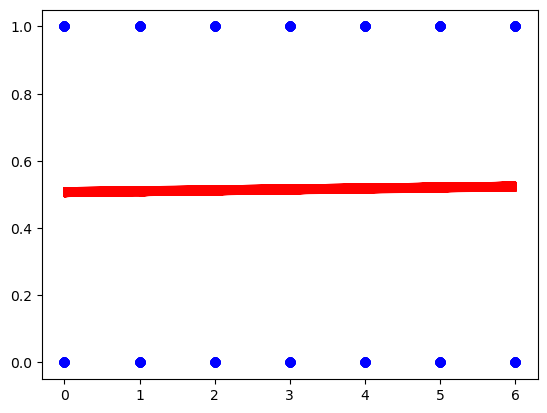

In [47]:
import matplotlib.pyplot as plt
plt.scatter(X_train.iloc[:, 0], y_train, color='blue')
plt.plot(X_train.iloc[:, 0], model.predict(X_train), color='red')
plt.show()

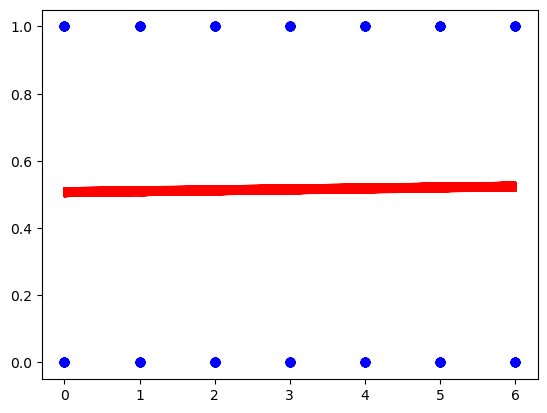

In [48]:
plt.scatter(X_test.iloc[:, 0], y_test, color='blue')
plt.plot(X_train.iloc[:, 0], model.predict(X_train), color='red')
plt.show()

# Next Day

In [50]:
df

,target,predictions,day_of_week,month
date,,,,
2019-12-31,1.0,1,1,12
2020-01-01,0.0,1,2,1
2020-01-02,1.0,1,3,1
2020-01-03,1.0,0,4,1
2020-01-04,1.0,0,5,1
...,...,...,...,...
2024-10-25,1.0,0,4,10
2024-10-26,1.0,1,5,10
2024-10-27,1.0,0,6,10


# F Score , Precision , Recall

In [52]:
from sklearn.metrics import recall_score
recall = recall_score(predictions["target"], predictions["predictions"])
print(f"Recall Score: {recall}")

Recall Score: 0.4839424141749723


In [53]:
precision=precision_score(predictions["target"], predictions["predictions"])    
print(f"Precision: {precision}")

Precision: 0.5177725118483413


In [54]:
f1_manual = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1_manual}")

F1 Score: 0.5002862049227247


In [55]:
threshold = 0.5
predicted_classes = (predictions['predictions'] >= threshold).astype(int)
predicted_classes

2019-12-31    1
2020-01-01    1
2020-01-02    1
2020-01-03    0
2020-01-04    0
             ..
2024-10-25    0
2024-10-26    1
2024-10-27    0
2024-10-28    0
2024-10-30    0
Name: predictions, Length: 1765, dtype: int32

# Next Day Prediction

In [57]:
import pandas as pd
from datetime import datetime, timedelta

last_date = df.index[-1] 
next_day = last_date + timedelta(days=1)

next_day_features = pd.DataFrame({
    'day_of_week': [next_day.weekday()],
    'month': [next_day.month]
})

prediction = model.predict(next_day_features)

print(f"Predicted target for {next_day.strftime('%Y-%m-%d')}: {prediction[0]}")

Predicted target for 2024-10-31: 0.5225529408538612


In [58]:
predicted_binary = 1 if prediction[0] > 0.5 else 0
print(f"Predicted target for {next_day.strftime('%Y-%m-%d')}: {predicted_binary} (Probability: {prediction[0]})")

Predicted target for 2024-10-31: 1 (Probability: 0.5225529408538612)


# Next Week

In [60]:
import pandas as pd
from datetime import datetime, timedelta

last_date = df.index[-1]
start_next_week = last_date + timedelta(days=1)

dates_next_week = [start_next_week + timedelta(days=i) for i in range(7)]

next_week_features = pd.DataFrame({
    'day_of_week': [date.weekday() for date in dates_next_week],
    'month': [date.month for date in dates_next_week]
})

predictions = model.predict(next_week_features)

predictions_df = pd.DataFrame({
    'Date': dates_next_week,
    'Day_of_Week': [date.strftime('%A') for date in dates_next_week],
    'Month': [date.strftime('%B') for date in dates_next_week],
    'Predicted_Target': predictions
})

print(predictions_df)

        Date Day_of_Week     Month  Predicted_Target
0 2024-10-31    Thursday   October          0.522553
1 2024-11-01      Friday  November          0.527375
2 2024-11-02    Saturday  November          0.530073
3 2024-11-03      Sunday  November          0.532771
4 2024-11-04      Monday  November          0.516582
5 2024-11-05     Tuesday  November          0.519280
6 2024-11-06   Wednesday  November          0.521978


# Example of another for Reference

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df[['day_of_week', 'month']]  
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None] 
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
F1 Score: 0.5111111111111111
Precision: 0.48936170212765956
Recall: 0.5348837209302325
